# Import and Read the Raw Data
## Import Libraries

In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from statsmodels.tools.eval_measures import rmse

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/antam-stock-market-by-kitto/ANTM.JK.csv


## Import and Read the Data

In [50]:
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_colwidth', -1)

antam = pd.read_csv('../input/antam-stock-market-by-kitto/ANTM.JK.csv', parse_dates=True)
antam['Date'] = pd.to_datetime(antam['Date'])
antam.index = antam['Date']

antam

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2005-09-29,2005-09-29,432.588074,436.787964,407.388763,432.588074,304.904572,76180670.0
2005-09-30,2005-09-30,457.787384,457.787384,432.588074,457.787384,322.666016,105493978.0
...,...,...,...,...,...,...,...
2021-02-02,2021-02-02,2600.000000,2630.000000,2420.000000,2420.000000,2420.000000,942434300.0
2021-02-03,2021-02-03,2390.000000,2520.000000,2290.000000,2330.000000,2330.000000,948031000.0


## Data Info and Description

In [51]:
pd.set_option('display.max_rows', None)

antam_desc = pd.DataFrame()
antam_desc['isna'] = antam.isna().sum()
antam_desc['isnull'] = antam.isnull().sum()
antam_desc['nunique'] = antam.nunique()

print(antam.info(verbose=True), '\n','-'*80,'\n','-'*80,'\n', antam_desc)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3808 entries, 2005-09-29 to 2021-02-03
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3808 non-null   datetime64[ns]
 1   Open       3807 non-null   float64       
 2   High       3807 non-null   float64       
 3   Low        3807 non-null   float64       
 4   Close      3807 non-null   float64       
 5   Adj Close  3807 non-null   float64       
 6   Volume     3807 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 238.0 KB
None 
 -------------------------------------------------------------------------------- 
 -------------------------------------------------------------------------------- 
            isna  isnull  nunique
Date       0     0       3808   
Open       1     1       655    
High       1     1       652    
Low        1     1       645    
Close      1     1       648    
Adj Close  1     1   

## Fill NaN value

In [52]:
antam['Open'] = antam['Open'].interpolate()
antam['Close'] = antam['Close'].interpolate()
antam['High'] = antam['High'].interpolate()
antam['Low'] = antam['Low'].interpolate()
antam['Adj Close'] = antam['Adj Close'].interpolate()
antam['Volume'] = antam['Volume'].interpolate()

antam.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [53]:
antam.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3808.000000,3808.000000,3808.000000,3808.000000,3808.000000,3.808000e+03
mean,1207.842828,1230.680843,1185.558010,1207.050397,1047.391263,6.857830e+07
std,664.829702,679.582108,649.190880,665.149052,495.638023,1.307962e+08
min,290.000000,294.000000,285.000000,287.000000,280.434296,0.000000e+00
25%,768.578796,780.000000,751.779297,765.000000,713.299744,1.420916e+07
50%,957.573608,978.573059,945.000000,957.573608,901.907929,3.422545e+07
75%,1595.956055,1621.155273,1570.756714,1595.956055,1346.766205,7.306411e+07
max,4409.878418,4451.877441,4115.886719,4241.883301,3190.000000,2.186653e+09


# Data Visualization

Text(0.5, 1.0, 'Close Prices of ANTM.JK')

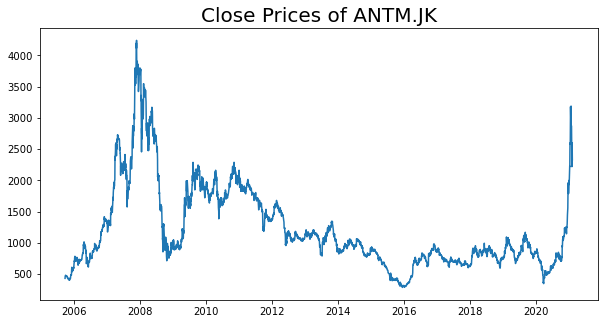

In [54]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(antam['Date'], antam['Close'])
ax.set_title('Close Prices of ANTM.JK', fontsize = 20)

# Predict

In [55]:
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras

print("Done")

Done


## Split Data into Train and Test Sets

Let's say because of pandemic, the data should only contain on when pandemic started until today. A 11 months from pandemic started is train set, on 30 January 2020, declared the outbreak of COVID-19 to be a Public Health Emergency of International Concern. A month later until end of the data as the test set.

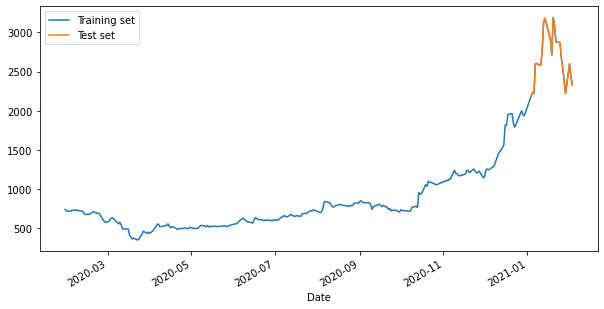

In [56]:
antam["Close"]['2020-01-30':'2021'].plot(figsize=(10,5),legend=True)
antam["Close"]['2021':].plot(figsize=(10,5),legend=True)
plt.legend(['Training set','Test set'])
plt.show()

In [74]:
train_set = antam.Close[(antam.index > '2020-01-30') & (antam.index < '2021-01-01')].values.reshape(-1, 1)
all_set = antam.Close[antam.index > '2020-01-30'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_all = scaler.fit_transform(all_set)
scaled_train = scaler.transform(train_set)

print("Train shape = {}".format(scaled_train.shape))
print("All shape = {}".format(scaled_all.shape))

window_size = 10    # Window size = number of previous values to predict the next value

def generateSequence(sequence, backward):
    x_train, y_train = list(), list()
    for i in range(sequence.shape[0]-backward):
        seq_x, seq_y = sequence[i:i+backward], sequence[i+backward]
        x_train.append(seq_x)
        y_train.append(seq_y)
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
    return x_train, y_train
    
x_train, y_train = generateSequence(scaled_train, window_size)
print("x shape = {}".format(x_train.shape))
print("y shape = {}".format(y_train.shape))

Train shape = (221, 1)
All shape = (244, 1)
x shape = (211, 10, 1)
y shape = (211, 1)


In [70]:
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, activation='relu', input_shape=(x_train.shape[1], 1)))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(1))

model_lstm.compile(loss='mean_squared_error', optimizer='adam')
epoch_history = model_lstm.fit(x_train, y_train, epochs=100, batch_size=36, verbose=2, validation_split=0.1)

Epoch 1/100
6/6 - 1s - loss: 0.0157 - val_loss: 0.1106
Epoch 2/100
6/6 - 0s - loss: 0.0049 - val_loss: 0.0458
Epoch 3/100
6/6 - 0s - loss: 0.0050 - val_loss: 0.0451
Epoch 4/100
6/6 - 0s - loss: 0.0031 - val_loss: 0.0614
Epoch 5/100
6/6 - 0s - loss: 0.0030 - val_loss: 0.0495
Epoch 6/100
6/6 - 0s - loss: 0.0020 - val_loss: 0.0261
Epoch 7/100
6/6 - 0s - loss: 0.0015 - val_loss: 0.0155
Epoch 8/100
6/6 - 0s - loss: 7.9013e-04 - val_loss: 0.0097
Epoch 9/100
6/6 - 0s - loss: 5.4678e-04 - val_loss: 0.0037
Epoch 10/100
6/6 - 0s - loss: 5.6996e-04 - val_loss: 0.0036
Epoch 11/100
6/6 - 0s - loss: 5.6980e-04 - val_loss: 0.0039
Epoch 12/100
6/6 - 0s - loss: 5.0631e-04 - val_loss: 0.0048
Epoch 13/100
6/6 - 0s - loss: 5.4174e-04 - val_loss: 0.0053
Epoch 14/100
6/6 - 0s - loss: 5.4336e-04 - val_loss: 0.0054
Epoch 15/100
6/6 - 0s - loss: 5.6479e-04 - val_loss: 0.0051
Epoch 16/100
6/6 - 0s - loss: 5.2283e-04 - val_loss: 0.0057
Epoch 17/100
6/6 - 0s - loss: 4.6642e-04 - val_loss: 0.0041
Epoch 18/100
6/6 

In [71]:
train_score = model_lstm.evaluate(x_train, y_train)
print('Train Score: %.6f MSE (%.6f RMSE)' % (train_score, math.sqrt(train_score)))

7/7 [==============================] - 0s 3ms/step - loss: 6.7701e-04
Train Score: 0.000677 MSE (0.026019 RMSE)


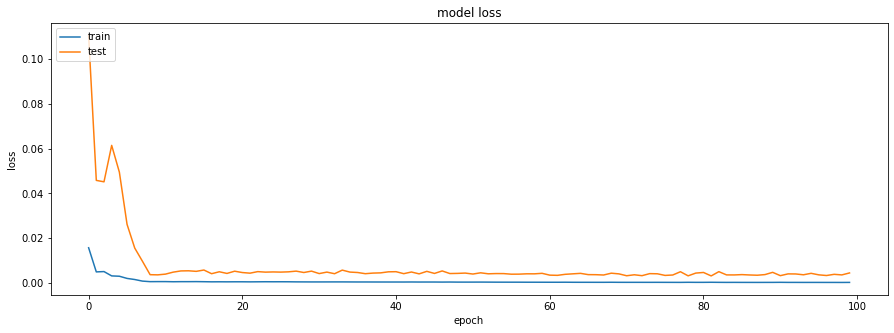

In [72]:
plt.figure(figsize=(15, 5))
plt.plot(epoch_history.history['loss'])
plt.plot(epoch_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

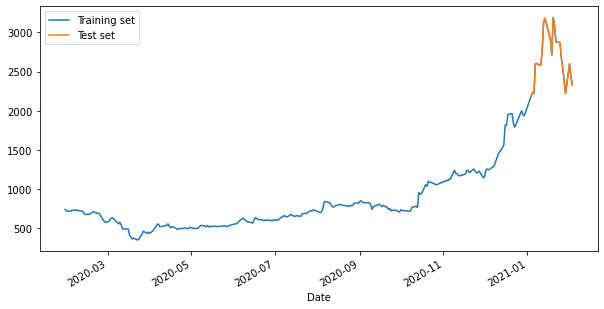

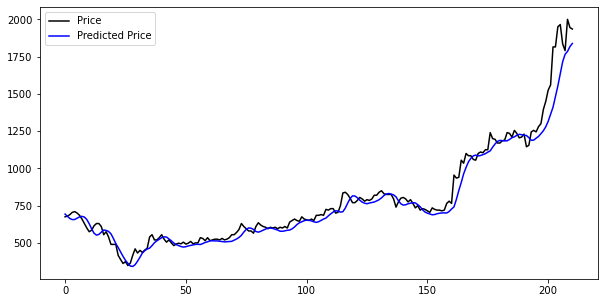

In [73]:
antam["Close"]['2020-01-30':'2021'].plot(figsize=(10,5),legend=True)
antam["Close"]['2021':].plot(figsize=(10,5),legend=True)
plt.legend(['Training set','Test set'])
plt.show()

y_train_predicted = model_lstm.predict(x_train)
y_inverse = scaler.inverse_transform(y_train)
y_train_predicted_inverse = scaler.inverse_transform(y_train_predicted)

plt.figure(figsize=(10, 5))
plt.plot(y_inverse.ravel(), label="Price", color='black')
plt.plot(y_train_predicted_inverse.ravel(), label="Predicted Price", color='blue')
plt.legend(loc=2)
plt.show()

# Predict all data when on Pandemic

Text(0.5, 1.0, 'All data - Prediction at 1 day based on the previous 10 days')

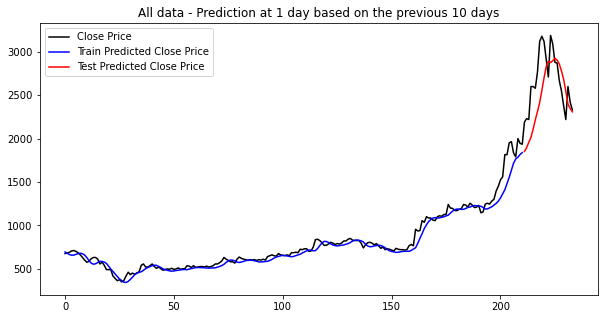

In [80]:
x_train, y_train = generateSequence(scaled_all, window_size)

y_predicted = model_lstm.predict(x_train)
y_inverse = scaler.inverse_transform(y_train)
y_predicted_inverse = scaler.inverse_transform(y_predicted)

plt.figure(figsize=(10, 5))
plt.plot(y_inverse.ravel(), label="Close Price", color='black')
plt.plot(pd.Series(y_predicted_inverse[:211].ravel(),index=range(0,211)), label="Train Predicted Close Price", color='blue')
plt.plot(pd.Series(y_predicted_inverse[211:].ravel(),index=range(211,234)), label="Test Predicted Close Price", color='red')
plt.legend(loc=2)
plt.title("All data - Prediction at 1 day based on the previous {} days".format(window_size))

# Additional

In [81]:
antam['delta'] = antam['Date'] - antam['Date'].shift(1)
#antam[['Date', 'delta']].head()
antam['delta'].sum(), antam['Date'].count(), antam['delta'].nunique(), antam['delta'].value_counts()

(Timedelta('5606 days 00:00:00'),
 3808,
 9,
 1 days     2968
 3 days     719 
 4 days     46  
 2 days     38  
 5 days     21  
 6 days     5   
 10 days    5   
 7 days     4   
 8 days     1   
 Name: delta, dtype: int64)

Still don't know should to handle this missing date or not